In [223]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.2
time: 0 ns (started: 2024-07-03 06:05:40 +05:30)


In [224]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.88 s (started: 2024-07-03 06:05:44 +05:30)


In [225]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import re
import os
from keras.models import load_model
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

time: 0 ns (started: 2024-07-03 06:05:53 +05:30)


# For train dataset

In [226]:
df_train = pd.read_csv("fraudTrain.csv")

df_train .head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


time: 12.4 s (started: 2024-07-03 06:05:56 +05:30)


In [227]:
df_train .isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

time: 4.83 s (started: 2024-07-03 06:06:08 +05:30)


In [229]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


time: 1.03 s (started: 2024-07-03 06:06:13 +05:30)


<Axes: >

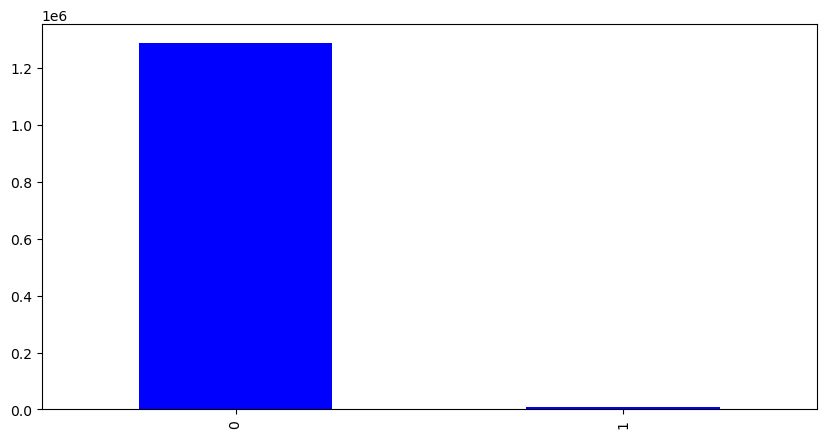

time: 406 ms (started: 2024-07-03 06:06:14 +05:30)


In [230]:
fraud_count = df_train ['is_fraud']
fraud_count.value_counts().plot(kind="bar",figsize=(10,5),color='blue')

In [231]:
# drop unnecessary columns
df_train .drop(columns=['Unnamed: 0','merchant', 'cc_num','first', 'last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip'], inplace= True)
df_train

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,Moravian Falls,NC,36.0788,-81.1781,3495,1988-03-09,0
1,2019-01-01 00:00:44,grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,1978-06-21,0
2,2019-01-01 00:00:51,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,1962-01-19,0
3,2019-01-01 00:01:16,gas_transport,45.00,Boulder,MT,46.2306,-112.1138,1939,1967-01-12,0
4,2019-01-01 00:03:06,misc_pos,41.96,Doe Hill,VA,38.4207,-79.4629,99,1986-03-28,0
...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,entertainment,15.56,Hatch,UT,37.7175,-112.4777,258,1961-11-24,0
1296671,2020-06-21 12:12:19,food_dining,51.70,Tuscarora,MD,39.2667,-77.5101,100,1979-12-11,0
1296672,2020-06-21 12:12:32,food_dining,105.93,High Rolls Mountain Park,NM,32.9396,-105.8189,899,1967-08-30,0
1296673,2020-06-21 12:13:36,food_dining,74.90,Manderson,SD,43.3526,-102.5411,1126,1980-08-18,0


time: 187 ms (started: 2024-07-03 06:06:28 +05:30)


In [232]:
# convert all dtype in float
df_train ['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train ['trans_date_trans_time'] = df_train ['trans_date_trans_time'].apply(lambda x: x.timestamp())
df_train ['dob'] = pd.to_datetime(df_train ['dob'])
df_train ['dob'] = df_train ['dob'].apply(lambda x: x.timestamp())
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['category','city', 'state']
for col in columns_to_convert_in_string_to_int:
    df_train [col] = label_encoder.fit_transform(df_train [col])
columns_to_convert_in_int_to_float = ['category','city', 'state','city_pop']
for col in columns_to_convert_in_int_to_float:
    df_train [col] = df_train [col].astype('float64')

time: 22.4 s (started: 2024-07-03 06:06:35 +05:30)


In [233]:
df_train .dtypes

trans_date_trans_time    float64
category                 float64
amt                      float64
city                     float64
state                    float64
lat                      float64
long                     float64
city_pop                 float64
dob                      float64
is_fraud                   int64
dtype: object

time: 15 ms (started: 2024-07-03 06:06:57 +05:30)


In [234]:
X = df_train .drop(columns=['is_fraud'])
Y = df_train ['is_fraud']

time: 78 ms (started: 2024-07-03 06:06:57 +05:30)


In [235]:
X

df = pd.DataFrame(X)

# Save the DataFrame to a CSV fi
df.to_csv('output_file3.csv', index=False)

time: 23.6 s (started: 2024-07-03 06:06:57 +05:30)


In [236]:
X

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob
0,1.546301e+09,8.0,4.97,526.0,27.0,36.0788,-81.1781,3495.0,573868800.0
1,1.546301e+09,4.0,107.23,612.0,47.0,48.8878,-118.2105,149.0,267235200.0
2,1.546301e+09,0.0,220.11,468.0,13.0,42.1808,-112.2620,4154.0,-250905600.0
3,1.546301e+09,2.0,45.00,84.0,26.0,46.2306,-112.1138,1939.0,-93744000.0
4,1.546301e+09,9.0,41.96,216.0,45.0,38.4207,-79.4629,99.0,512352000.0
...,...,...,...,...,...,...,...,...,...
1296670,1.592742e+09,0.0,15.56,330.0,44.0,37.7175,-112.4777,258.0,-255744000.0
1296671,1.592742e+09,1.0,51.70,813.0,20.0,39.2667,-77.5101,100.0,313718400.0
1296672,1.592742e+09,1.0,105.93,346.0,32.0,32.9396,-105.8189,899.0,-73872000.0
1296673,1.592742e+09,1.0,74.90,471.0,41.0,43.3526,-102.5411,1126.0,335404800.0


time: 47 ms (started: 2024-07-03 06:07:21 +05:30)


In [237]:
Y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

time: 0 ns (started: 2024-07-03 06:07:21 +05:30)


In [238]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

time: 453 ms (started: 2024-07-03 06:07:21 +05:30)


In [239]:
X

array([[-1.8518249 ,  0.45285278, -0.40782607, ...,  0.65761961,
        -0.28258876,  0.82970364],
       [-1.85182288, -0.56926552,  0.23003923, ..., -2.03387012,
        -0.29366984,  0.27097443],
       [-1.85182233, -1.59138383,  0.93414872, ..., -1.60153717,
        -0.28040632, -0.67315042],
       ...,
       [ 1.76070971, -1.33585425,  0.22193025, ..., -1.13325703,
        -0.29118603, -0.3505705 ],
       [ 1.76071469, -1.33585425,  0.02837499, ..., -0.89502874,
        -0.29043427,  0.39518895],
       [ 1.76071477, -1.33585425, -0.41200532, ..., -1.71875438,
        -0.29344133,  1.25729129]])

time: 15 ms (started: 2024-07-03 06:07:21 +05:30)


In [240]:
X_train, _ , Y_train, _ = train_test_split(X, Y, random_state=42)

time: 609 ms (started: 2024-07-03 06:07:21 +05:30)


# FOR TEST DATASET

In [241]:
# load the dataset
df_test = pd.read_csv("fraudTest.csv")

df_test .head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


time: 5.28 s (started: 2024-07-03 06:08:13 +05:30)


In [242]:
# cheak if there any null value or not
df_test .isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

time: 2.05 s (started: 2024-07-03 06:08:18 +05:30)


In [243]:
# cheak the datatype
df_test .dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

time: 0 ns (started: 2024-07-03 06:08:21 +05:30)


In [244]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


time: 469 ms (started: 2024-07-03 06:08:26 +05:30)


<Axes: >

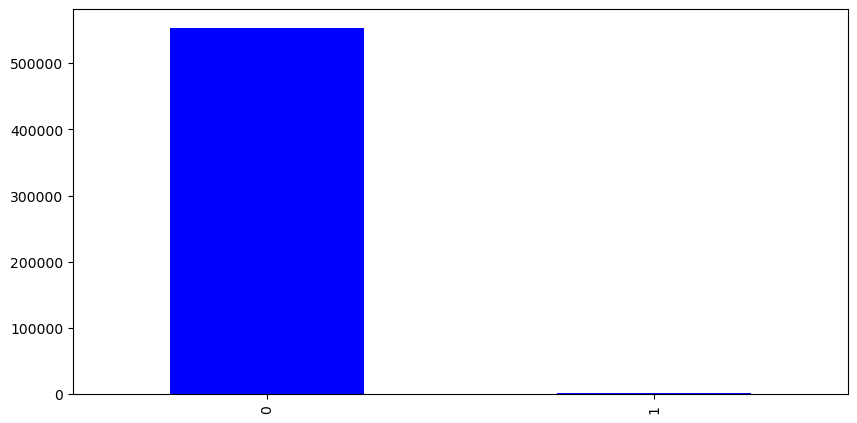

time: 328 ms (started: 2024-07-03 06:08:30 +05:30)


In [245]:
fraud_count = df_test ['is_fraud']
fraud_count.value_counts().plot(kind="bar",figsize=(10,5),color='blue')

In [246]:
# drop unnecessary columns
df_test .drop(columns=['Unnamed: 0','merchant', 'cc_num','first', 'last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip'], inplace= True)
df_test

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,Columbia,SC,33.9659,-80.9355,333497,1968-03-19,0
1,2020-06-21 12:14:33,personal_care,29.84,Altonah,UT,40.3207,-110.4360,302,1990-01-17,0
2,2020-06-21 12:14:53,health_fitness,41.28,Bellmore,NY,40.6729,-73.5365,34496,1970-10-21,0
3,2020-06-21 12:15:15,misc_pos,60.05,Titusville,FL,28.5697,-80.8191,54767,1987-07-25,0
4,2020-06-21 12:15:17,travel,3.19,Falmouth,MI,44.2529,-85.0170,1126,1955-07-06,0
...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,1966-02-13,0
555715,2020-12-31 23:59:09,kids_pets,111.84,Lake Jackson,TX,29.0393,-95.4401,28739,1999-12-27,0
555716,2020-12-31 23:59:15,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,1981-11-29,0
555717,2020-12-31 23:59:24,travel,7.99,Mesa,ID,44.6255,-116.4493,129,1965-12-15,0


time: 94 ms (started: 2024-07-03 06:08:39 +05:30)


In [247]:
# convert all dtype in float
df_test ['trans_date_trans_time'] = pd.to_datetime(df_test ['trans_date_trans_time'])
df_test ['trans_date_trans_time'] = df_test ['trans_date_trans_time'].apply(lambda x: x.timestamp())
df_test ['dob'] = pd.to_datetime(df_test ['dob'])
df_test ['dob'] = df_test['dob'].apply(lambda x: x.timestamp())
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['category','city', 'state']
for col in columns_to_convert_in_string_to_int:
    df_test [col] = label_encoder.fit_transform(df_test [col])
columns_to_convert_in_int_to_float = ['category','city', 'state','city_pop']
for col in columns_to_convert_in_int_to_float:
    df_test [col] = df_test [col].astype('float64')

time: 9.39 s (started: 2024-07-03 06:08:46 +05:30)


In [248]:
df_test .dtypes

trans_date_trans_time    float64
category                 float64
amt                      float64
city                     float64
state                    float64
lat                      float64
long                     float64
city_pop                 float64
dob                      float64
is_fraud                   int64
dtype: object

time: 0 ns (started: 2024-07-03 06:09:22 +05:30)


In [249]:
X_test_initial = df_test .drop(columns=['is_fraud'])
Y_test_initial = df_test ['is_fraud']

time: 47 ms (started: 2024-07-03 06:09:30 +05:30)


In [250]:
X_test_initial



,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob
0,1.592742e+09,10.0,2.86,157.0,39.0,33.9659,-80.9355,333497.0,-56419200.0
1,1.592742e+09,10.0,29.84,16.0,43.0,40.3207,-110.4360,302.0,632534400.0
2,1.592742e+09,5.0,41.28,61.0,33.0,40.6729,-73.5365,34496.0,25315200.0
3,1.592742e+09,9.0,60.05,764.0,8.0,28.5697,-80.8191,54767.0,554169600.0
4,1.592742e+09,13.0,3.19,247.0,21.0,44.2529,-85.0170,1126.0,-457315200.0
...,...,...,...,...,...,...,...,...,...
555714,1.609459e+09,5.0,43.77,443.0,23.0,40.4931,-91.8912,519.0,-122515200.0
555715,1.609459e+09,7.0,111.84,401.0,42.0,29.0393,-95.4401,28739.0,946252800.0
555716,1.609459e+09,7.0,86.88,104.0,46.0,46.1966,-118.9017,3684.0,375840000.0
555717,1.609459e+09,13.0,7.99,476.0,12.0,44.6255,-116.4493,129.0,-127699200.0


time: 32 ms (started: 2024-07-03 06:09:33 +05:30)


In [251]:
Y_test_initial

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

time: 15 ms (started: 2024-07-03 06:09:40 +05:30)


In [252]:
scaler = StandardScaler()
X_test_initial= scaler.fit_transform(X_test_initial)

time: 203 ms (started: 2024-07-03 06:09:54 +05:30)


In [253]:
X_test_initial

array([[-1.70387057,  0.9616832 , -0.42446311, ...,  0.677451  ,
         0.81652054, -0.32414447],
       [-1.70386903,  0.9616832 , -0.25233729, ..., -1.47245426,
        -0.2926852 ,  0.92833581],
       [-1.70386518, -0.31615123, -0.17935288, ...,  1.21666725,
        -0.17885341, -0.17555576],
       ...,
       [ 1.5103518 ,  0.19498254,  0.11156401, ..., -2.08940832,
        -0.28142652,  0.46167931],
       [ 1.51035353,  1.72838387, -0.39173496, ..., -1.91068498,
        -0.29326111, -0.45372764],
       [ 1.51035546, -1.59398566, -0.19944911, ..., -0.52824645,
         0.09247663,  1.11823406]])

time: 0 ns (started: 2024-07-03 06:09:57 +05:30)


In [254]:
df = pd.DataFrame(X_test_initial)

# Save the DataFrame to a CSV fi
df.to_csv('output_file.csv4', index=False)

time: 18.3 s (started: 2024-07-03 06:10:06 +05:30)


In [255]:
X_test, _ , Y_test, _ = train_test_split(X_test_initial, Y_test_initial, random_state=42)

time: 203 ms (started: 2024-07-03 06:10:25 +05:30)


# Shape of the train and test set

In [256]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((972506, 9), (416789, 9), (972506,), (416789,))

time: 15 ms (started: 2024-07-03 06:10:37 +05:30)


# Models

In [257]:
#Tensorflow model (custom)
model = Sequential([
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

time: 32 ms (started: 2024-07-03 06:10:40 +05:30)


In [258]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

time: 203 ms (started: 2024-07-03 06:10:43 +05:30)


In [259]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=1024, validation_split=0.2)

Epoch 1/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9780 - loss: 0.0691 - val_accuracy: 0.9945 - val_loss: 0.0191
Epoch 2/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9948 - loss: 0.0183 - val_accuracy: 0.9955 - val_loss: 0.0160
Epoch 3/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9957 - loss: 0.0161 - val_accuracy: 0.9958 - val_loss: 0.0150
Epoch 4/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9959 - loss: 0.0154 - val_accuracy: 0.9959 - val_loss: 0.0142
Epoch 5/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9960 - loss: 0.0144 - val_accuracy: 0.9961 - val_loss: 0.0131
Epoch 6/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9960 - loss: 0.0136 - val_accuracy: 0.9960 - val_loss: 0.0126
Epoch 7/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9961 - loss: 0.0128 - val_accuracy: 0.9966 - val_loss: 0.0113
Epoch 8/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9965 - loss: 0.0117 - val_acc

Logistic Regression

In [260]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced')

time: 1.83 s (started: 2024-07-03 06:12:51 +05:30)


Decision Tree

In [261]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

time: 18.1 s (started: 2024-07-03 06:12:57 +05:30)


Random Forest

In [262]:
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')
random_forest.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

time: 7min 38s (started: 2024-07-03 06:13:15 +05:30)


In [263]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, Y_train)


time: 1.89 s (started: 2024-07-03 06:20:53 +05:30)


In [264]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = log_reg.predict(X_test)
print(classification_report(Y_test, y_pred))
print("AUC-ROC:", roc_auc_score(Y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97    415173
           1       0.05      0.75      0.10      1616

    accuracy                           0.95    416789
   macro avg       0.53      0.85      0.54    416789
weighted avg       1.00      0.95      0.97    416789

AUC-ROC: 0.847102612753128
time: 1.31 s (started: 2024-07-03 06:20:55 +05:30)


# Models evaluation and predection

Tensorflow model

In [265]:
# Evaluate
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'\n Accuracy: {accuracy}')

# Predict
y_pred_tf = (model.predict(X_test) > 0.5).astype("int32")

13025/13025 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9975 - loss: 0.0092

 Accuracy: 0.9975335001945496
13025/13025 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step
time: 1min 19s (started: 2024-07-03 06:23:08 +05:30)


In [266]:
input_data = np.array([[-1.6944094915775796,-0.5717181167950341,1.809855123249568,1.497946043697083,-1.2589076131680728,-2.1556091479774833,0.7162506687732966,0.05797821509249063,0.7161335430648444]])

import numpy as np

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predict one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = random_forest.predict(input_data_reshaped)

print(prediction)


if prediction[0] == 0:
 print("the object is not fraud")
else:
 print("the object is a fraud")



[1]
the object is a fraud
time: 63 ms (started: 2024-07-03 06:25:00 +05:30)


In [271]:
input_data = np.array([[-1.7002686374497555,-1.338418777394707,-0.2756233987994754,-1.4961793097778358,0.7953961366462301,0.43969597912350256,0.7194499650967495,-0.19906376424847153,1.5245754741035016]])

import numpy as np

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predict one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = log_reg.predict(input_data_reshaped)

print(prediction)


if prediction[0] == 0:
 print("the object is not fraud")
else:
 print("the object is a fraud")


[0]
the object is not fraud
time: 16 ms (started: 2024-07-03 06:26:01 +05:30)


Logistic Regression

In [268]:
# Predict
y_pred_log_reg = log_reg.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log_reg)}")
print(classification_report(Y_test, y_pred_log_reg))

Accuracy: 0.9471363207762201
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    415173
           1       0.05      0.75      0.10      1616

    accuracy                           0.95    416789
   macro avg       0.53      0.85      0.54    416789
weighted avg       1.00      0.95      0.97    416789

time: 1.3 s (started: 2024-07-03 06:25:10 +05:30)


Decision Tree

In [272]:
# Predict
y_pred_tree = decision_tree.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_tree)}")
print(classification_report(Y_test, y_pred_tree))

Accuracy: 0.9960843496349472
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    415173
           1       0.50      0.61      0.55      1616

    accuracy                           1.00    416789
   macro avg       0.75      0.80      0.77    416789
weighted avg       1.00      1.00      1.00    416789

time: 1.3 s (started: 2024-07-03 06:26:18 +05:30)


Random Forest

In [273]:
# Predict
y_pred_forest = random_forest.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_forest)}")
print(classification_report(Y_test, y_pred_forest))

joblib.dump(random_forest, 'random_forest_model.pkl')

Accuracy: 0.9976103016154457
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    415173
           1       0.78      0.53      0.63      1616

    accuracy                           1.00    416789
   macro avg       0.89      0.76      0.82    416789
weighted avg       1.00      1.00      1.00    416789



['random_forest_model.pkl']

time: 12.8 s (started: 2024-07-03 06:26:24 +05:30)


# Visualization(confusion matrix)

In [274]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('True vs Predicted matrix')
    plt.show()

time: 16 ms (started: 2024-07-03 06:26:37 +05:30)


Tensorflow model

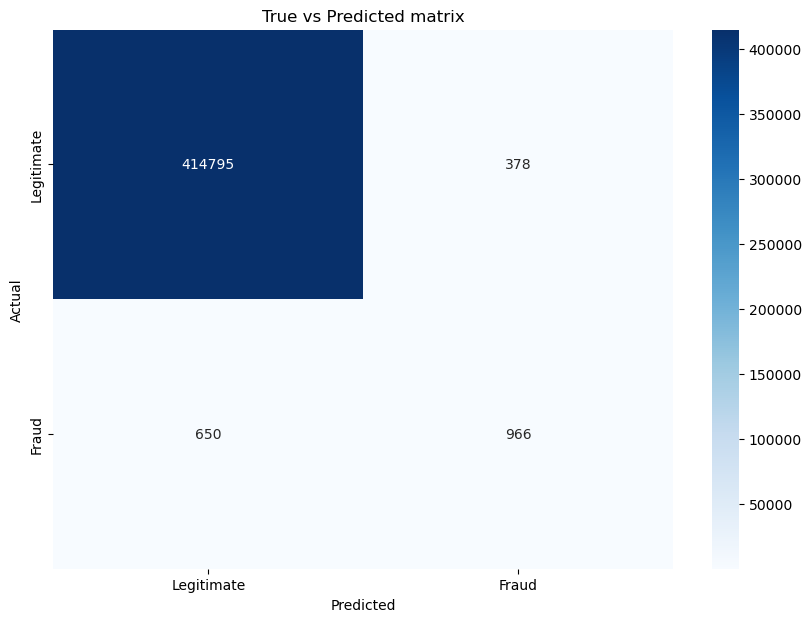

time: 656 ms (started: 2024-07-03 06:26:43 +05:30)


In [275]:
plot_confusion_matrix(Y_test, y_pred_tf)

Logistic Regression

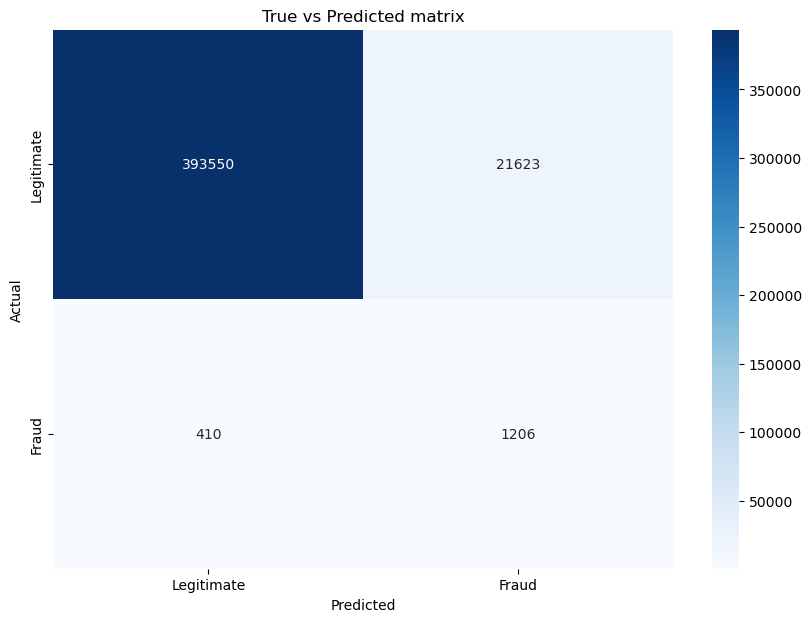

time: 594 ms (started: 2024-07-03 06:26:48 +05:30)


In [276]:
plot_confusion_matrix(Y_test, y_pred_log_reg)

Decision Tree

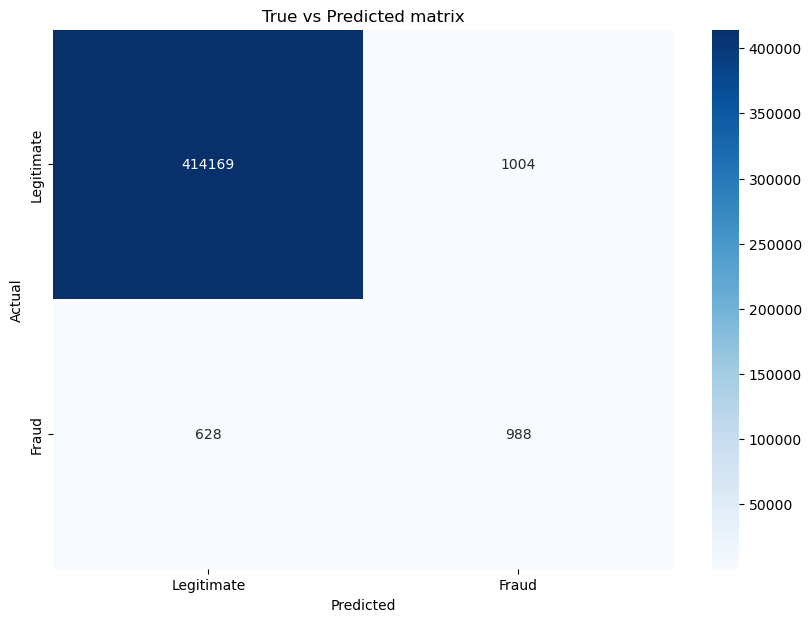

time: 578 ms (started: 2024-07-03 06:26:52 +05:30)


In [277]:
plot_confusion_matrix(Y_test, y_pred_tree)

Random Forest

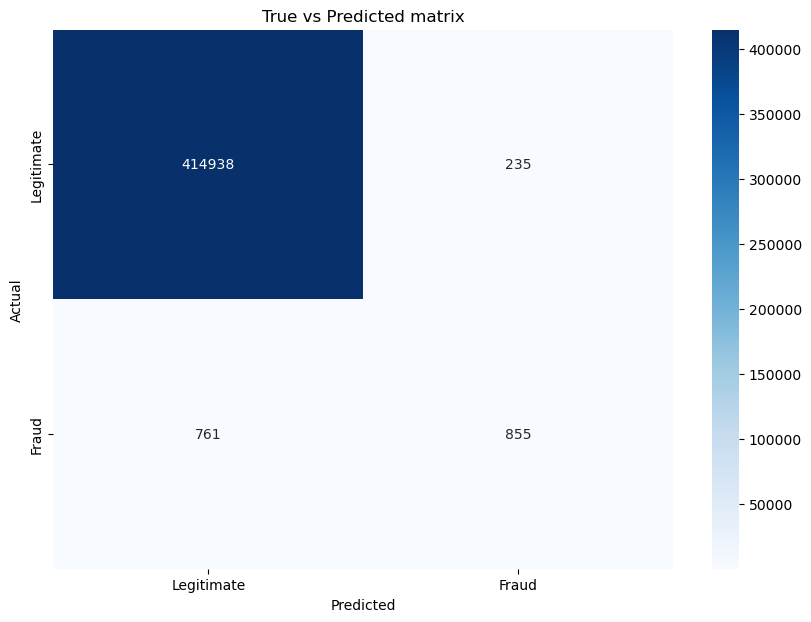

time: 593 ms (started: 2024-07-03 06:26:56 +05:30)


In [278]:
plot_confusion_matrix(Y_test, y_pred_forest)